# LeanIX Example - no tool required
In this example we will follow LeanIX thinking framework - going through the steps of the LeanIX process. We don't need any tool for that - I will document architecture using graph visualization library. Think of it as the line of thought, not the notation or the tool or whatever.

## Business Architecture
Business architecture is a very simple thing - its an overlay of the applications/service meshes we have over the business processes we have. Value chain consist of capabilities we need to have (which will be further described as biz processes with the BAs - we are not concerned about it at this point) and systems we have enable these capabilities. And this is our area of concern in this example.

In [1]:
from leanix import *

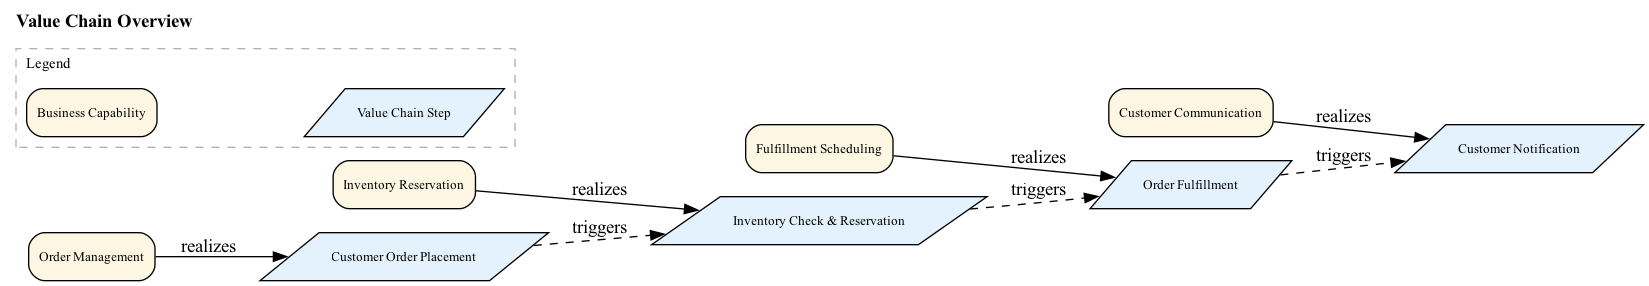

In [2]:
show_biz_arch()

Our retail value chain is very simple (for the sake of example) - we take orders, we manage inventory to fullfill them, we communicate state of things to the customer. You see all main applications we have in blue. Lets now look deeper into how these applications interact with each other and what are the main components of these applications. Ideally we will have User Journey [along the value] chain to better understand what our apps have to do.|

## Application Architecture
In this view we are not concerned with the particulars of the applications - we are concerned with the main components of these applications and how they interact with each other. Note that interfaces are first-class citizens here - each of them will be described and maintained with its own contract and data sheet - because you cannot break your API or signaling contracts without affecting other parts of the flow. Quite often we will have versioned "API/Integration View" in our architecture: "API v1", "API v2" etc.

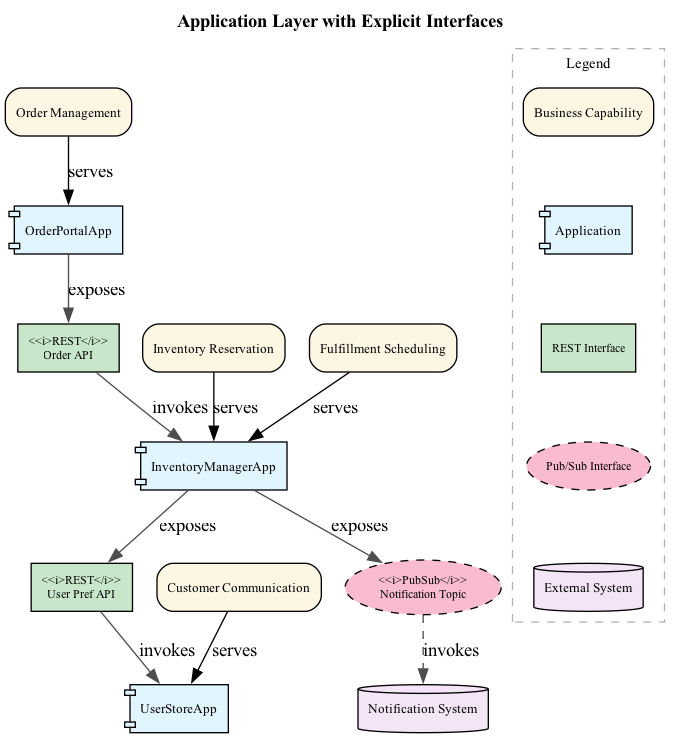

In [3]:
show_app_arch()

## Data Flow
Data flow depicts Entities and their relationships. If you lead InventoryManagementApp, for example, you immediately understand that Lead for the OrderPortal is your best friend and you need to talk frequently because your app exists to take Orders from them, and so forth. Entities will be your future tables or document collections. Your Entities also have to be catalogued as changes in entity schemas (at least breaking changes - ALTER ...) have to be agreed upon upfront. 

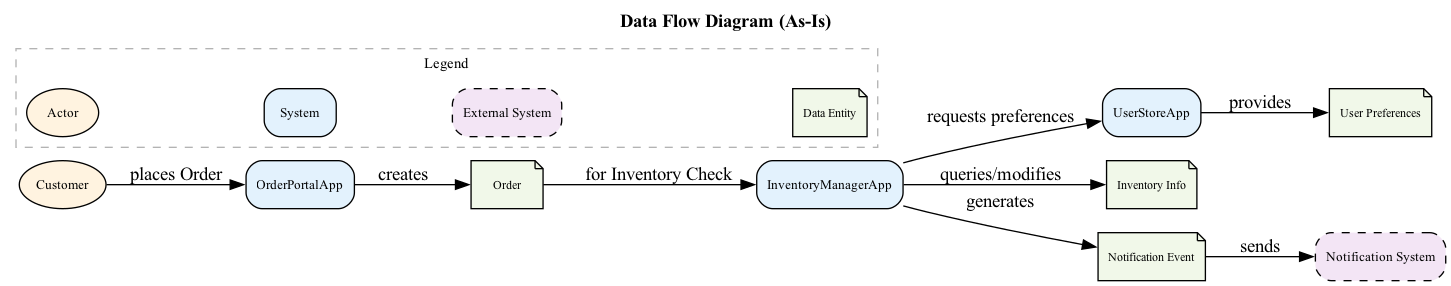

In [4]:
show_data_flow()

## Technology Architecture
Now its time to think what do we need to implement our app - what runtimes we rely upon, where are they hosted, how data is stored, how pubsubs are actually implemented, where do we store BLOBs etc. Everything under "blue" of apps are platform components - we either build it (for example, we do "NFS storage" by creating a NAS storage for NFS volume used to store BLOBs) or we buy it (like we buy S3). Buying components is quite often better in terms both time-to-market and TCO (if you your usage pattern is not constant). 

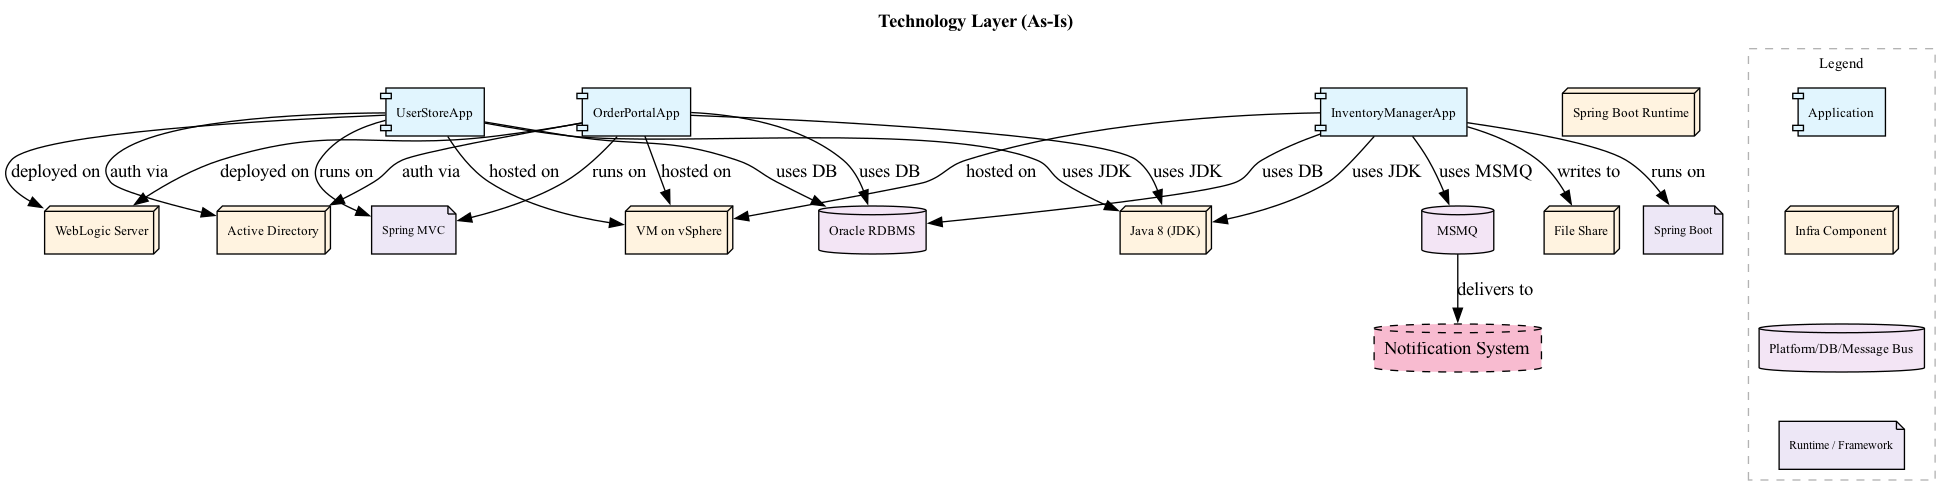

In [5]:
show_technology_arch()

## User Journey
Looks reasonable. Whats wrong with the current implementation?

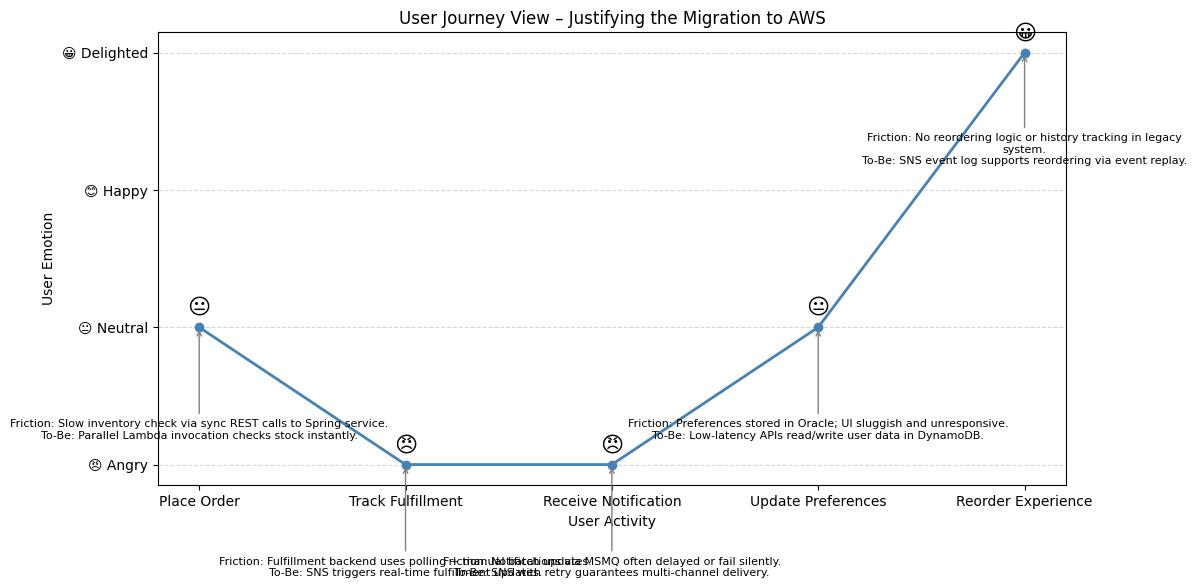

In [6]:
show_user_journey()

As you see, some of the things we can probably fix with existing technology - just by beefing up hardware to speed up controller responses etc. But some of them - UI on pause while we are waiting for the controller to respond while we are waiting for the queue to respond are limitations of the paradigm. 

## TOBE Architecture
Now we have to think about what we want to achieve in the future. As you see, our stacks are quite dated - we will have hard time upgrade it, we cannot take advantage of growing open source ecosystem, we cannot handle seasonal workload spikes well. After some deliberation we decided we want to move forward with Python as primary dev ecosystem, and Serverless AWS as primary infrastructure paradigm. Lets redraw our application architecture to reflect this - our fat apps which can be scaled in their entirety were split into serverless functions which can have their capacity adjusted on per-function basis. We also decided to move to event-driven architecture - as our business is literally structured around responding to events.

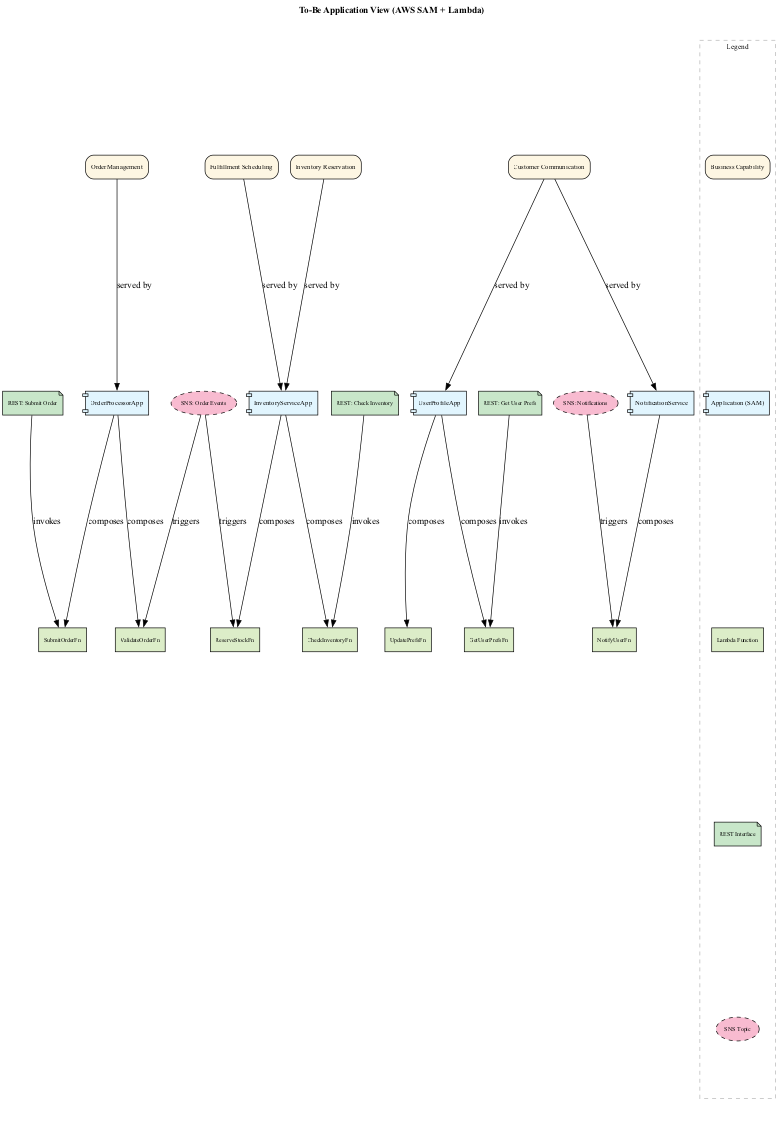

In [7]:
show_tobe_app_arch()

## TOBE Technology Architecture
This, in turn, will require underlying platform components replaced. Lets see what we will use for the auth, compute, storage etc.

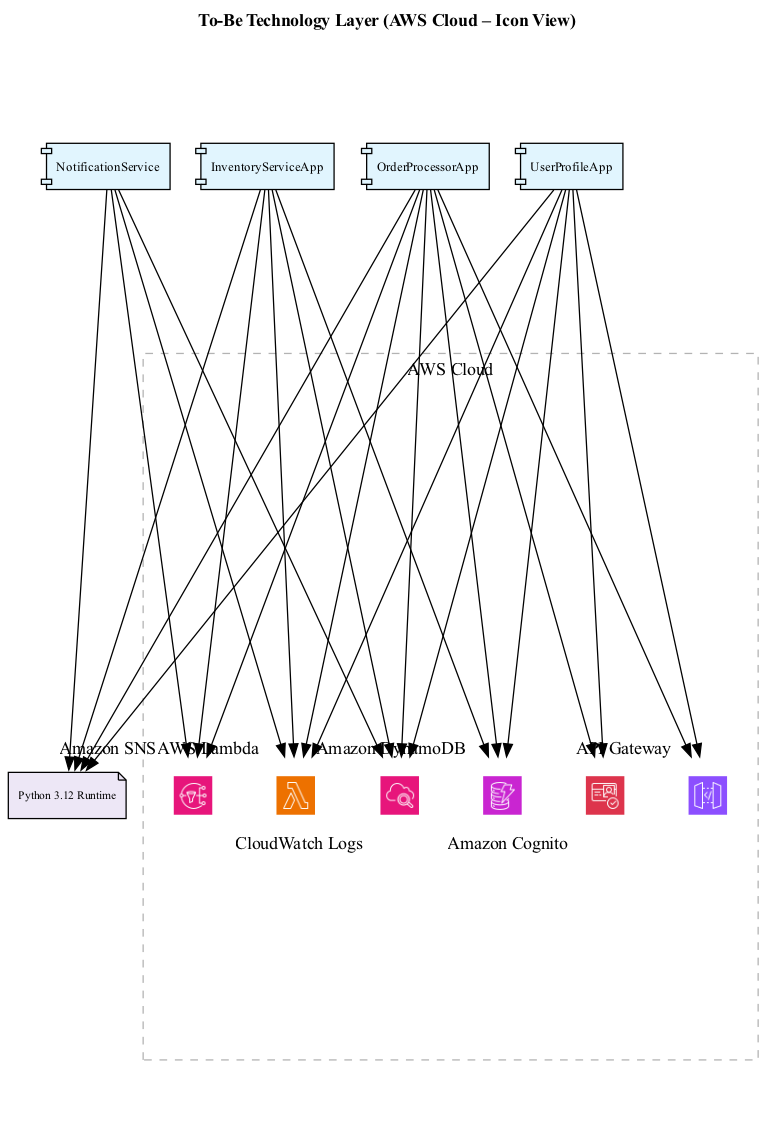

In [8]:
show_tobe_tech_arch()

It is also very beneficial to show overlay of existing -> future stacks, so we can see what will supersede what at a glance.

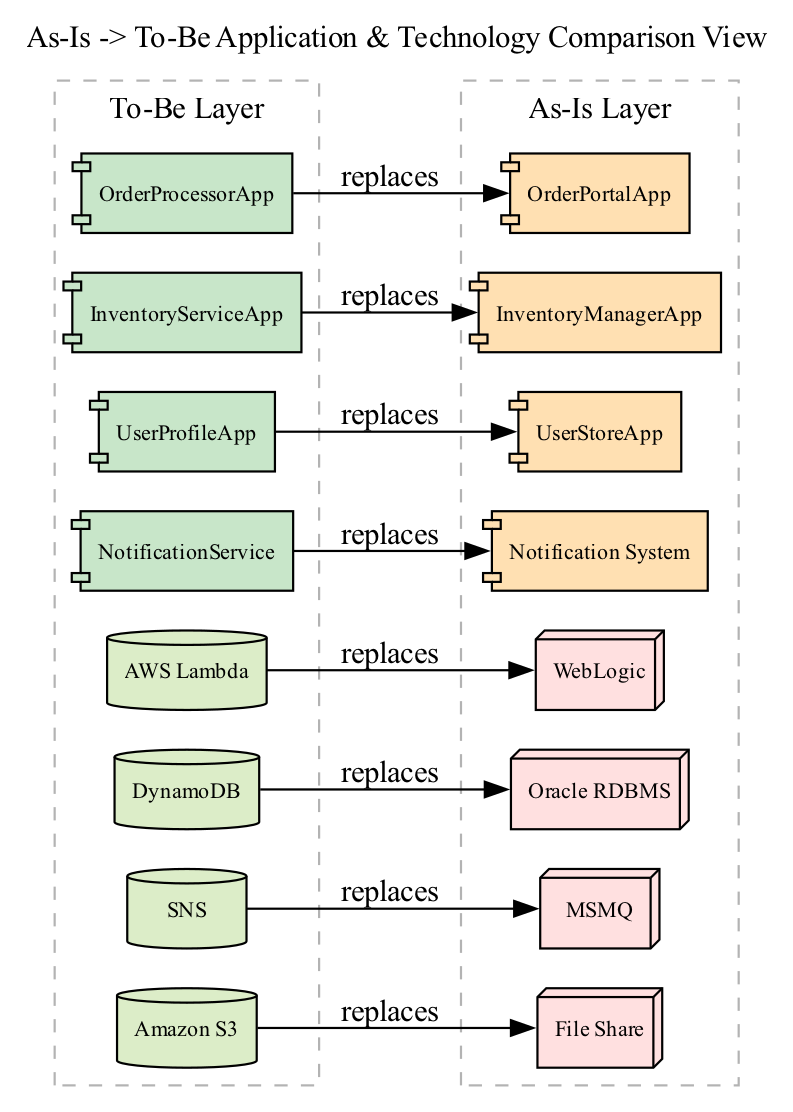

In [9]:
show_sidebyside_view()


## Technology Roadmap
And now we are ready to create a roadmap. We will use the same approach as we did with the architecture - we will have a roadmap for each of the layers. We will also have a roadmap for the entire stack - this is where we will show what will be replaced by what, and when.

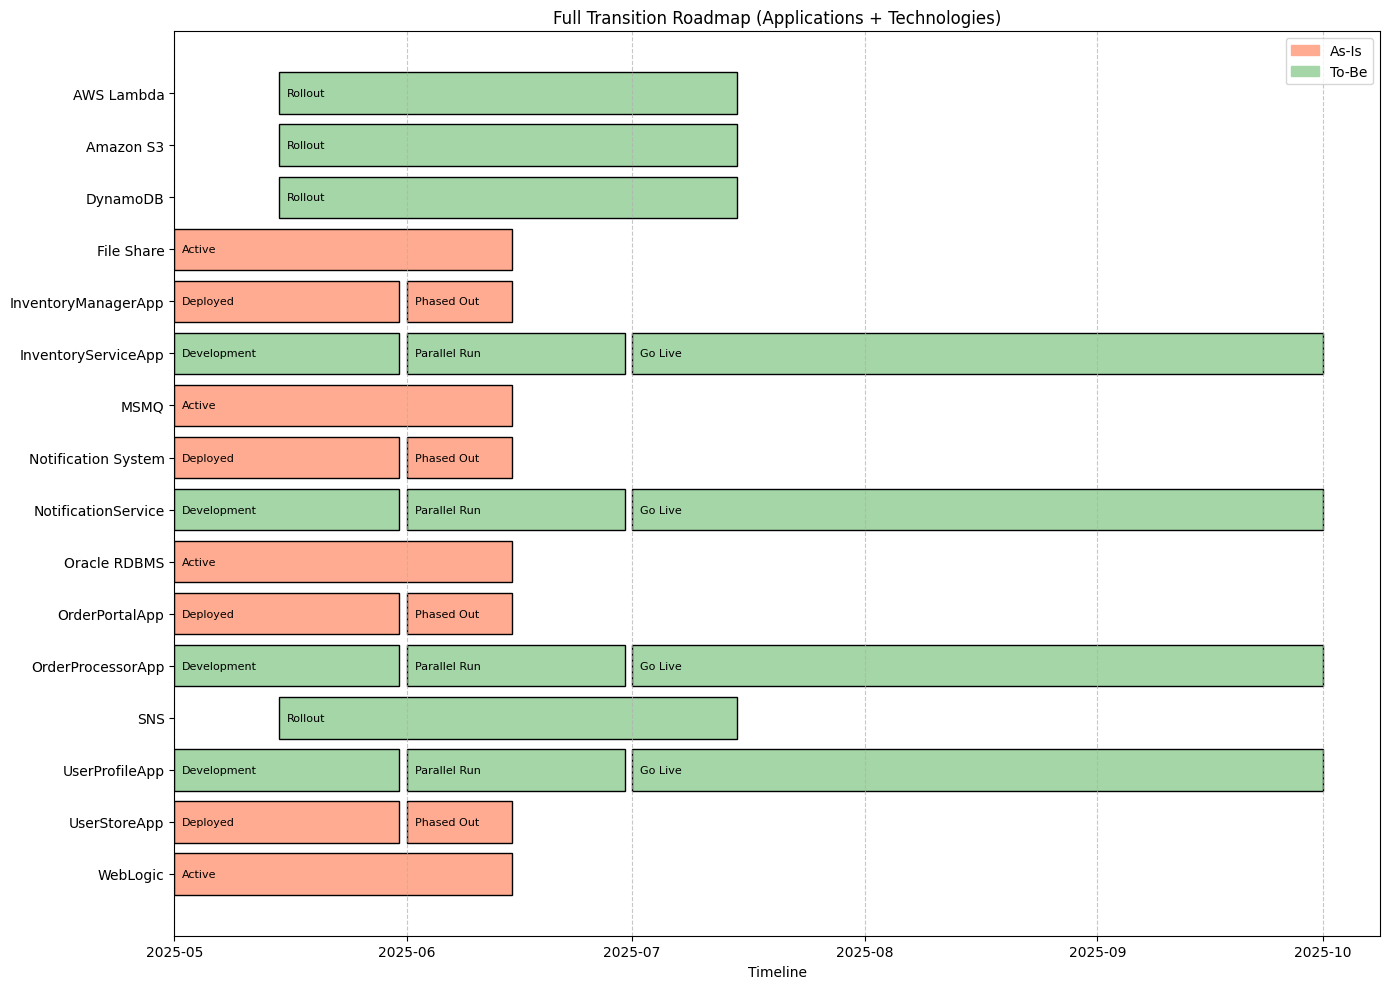

In [10]:
show_roadmap_plot()

## Conclusion
I started creating this example at 12:36pm today. It took me about slightly less than 2 hours to create it, including inventing the application. It answers the question of "what do we have", "what do we want to achieve", "how do we get there" and "when do we get there". It is not a perfect example, but it is a good start. I hope you will find it useful. 
You can find source code here: https://github.com/petelind/LeanIX